In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
aisles=pd.read_csv("Data/aisles.csv")
department=pd.read_csv("Data/departments.csv")
order_prior=pd.read_csv("Data/order_products__prior.csv")
order_train=pd.read_csv("Data/order_products__train.csv")
orders=pd.read_csv("Data/orders.csv")
products=pd.read_csv("Data/products.csv")
samp_subm=pd.read_csv("Data/sample_submission.csv")

In [5]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


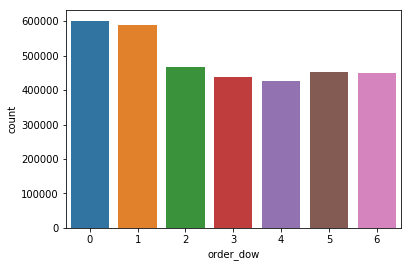

In [6]:
sns.countplot(x="order_dow", data=orders)
plt.show()

* most orders take place in first 2 days of the week -> *Which are the products bought in the first two days? Can we find a pattern?*

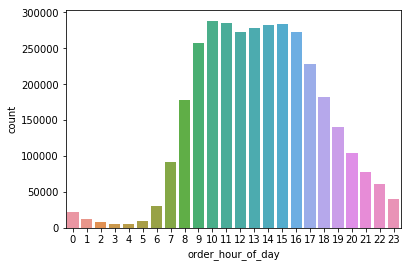

In [12]:
sns.countplot(x="order_hour_of_day", data=orders)


* Most of the orders take place between 8 and 16 hours. This where the market is most active. Is this the same trend for all the days of the week (weekend /weekday)?

Text(0,0.5,'count')

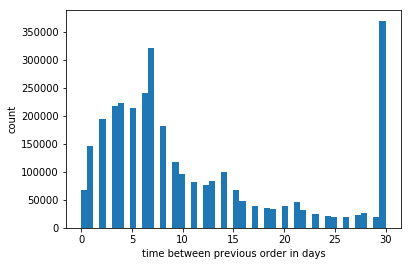

In [20]:
orders['days_since_prior_order'].plot(kind='hist',bins=50)
plt.xlabel('time between previous order in days')
plt.ylabel('count')

* Most of the customers give orders in a weekly and monthly basis as evident from the peaks at 7 and 30 days. Which products are being reordered the most? Can we find products ordered weekly/monthly?

In [13]:
order_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


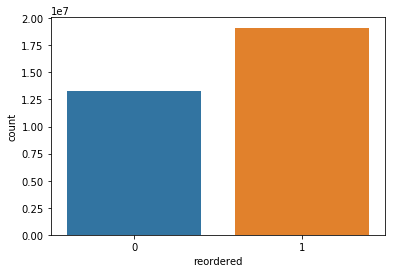

In [14]:
sns.countplot(x="reordered", data=order_prior)

* majority of the orders were reordered again

Text(0.5,0,'orders in cart')

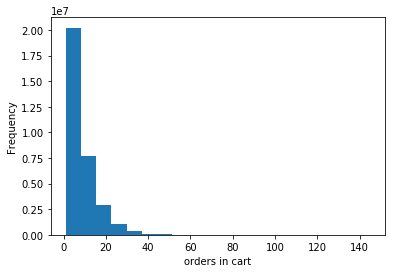

In [30]:
order_prior['add_to_cart_order'].plot(kind='hist',bins=20)
plt.xlabel('orders in cart')

* Objects in the cart were in the range from 0 to 40 with majority being 1 or 2 purchases

In [3]:
#merging dataframes order_prior and products
order_prior = pd.merge(order_prior, products, on='product_id', how='left')

In [4]:
#merging dataframe with aisles
order_prior=pd.merge(order_prior,aisles,on='aisle_id',how='left')

In [5]:
#merging dataframe with department
order_prior=pd.merge(order_prior,department,on='department_id',how='left')

In [9]:
order_prior.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry


In [77]:
#function to only return aisles grouped by the department specified.
def groupFunc(data,departmentName):
    depart_vise_aisle=order_total.groupby(["department", "aisle"], as_index=False).size()
    depart_vise_aisle = depart_vise_aisle.to_frame().reset_index()
    depart_vise_aisle = depart_vise_aisle.rename(columns= {0: 'list'})
    depart_vise_aisle.index.name = 'index'
    return depart_vise_aisle[depart_vise_aisle['department']==departmentName]

In [81]:
groupFunc(order_prior,'dairy eggs')

,department,aisle,list
index,,,
33,dairy eggs,butter,88158
34,dairy eggs,cream,109915
35,dairy eggs,eggs,169157
36,dairy eggs,milk,319553
37,dairy eggs,other creams cheeses,109271
38,dairy eggs,packaged cheese,364210
39,dairy eggs,refrigerated pudding desserts,12817
40,dairy eggs,soy lactosefree,233748
41,dairy eggs,specialty cheeses,28051


In [55]:
#Function to get bar plot based on count of column 2 from column1 
def Col1ViseCol2Plot(data,col1,col2,TrueOrFalse):
    table=pd.crosstab(index=data[col1], 
                          columns=data[col2])
    return table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=TrueOrFalse)

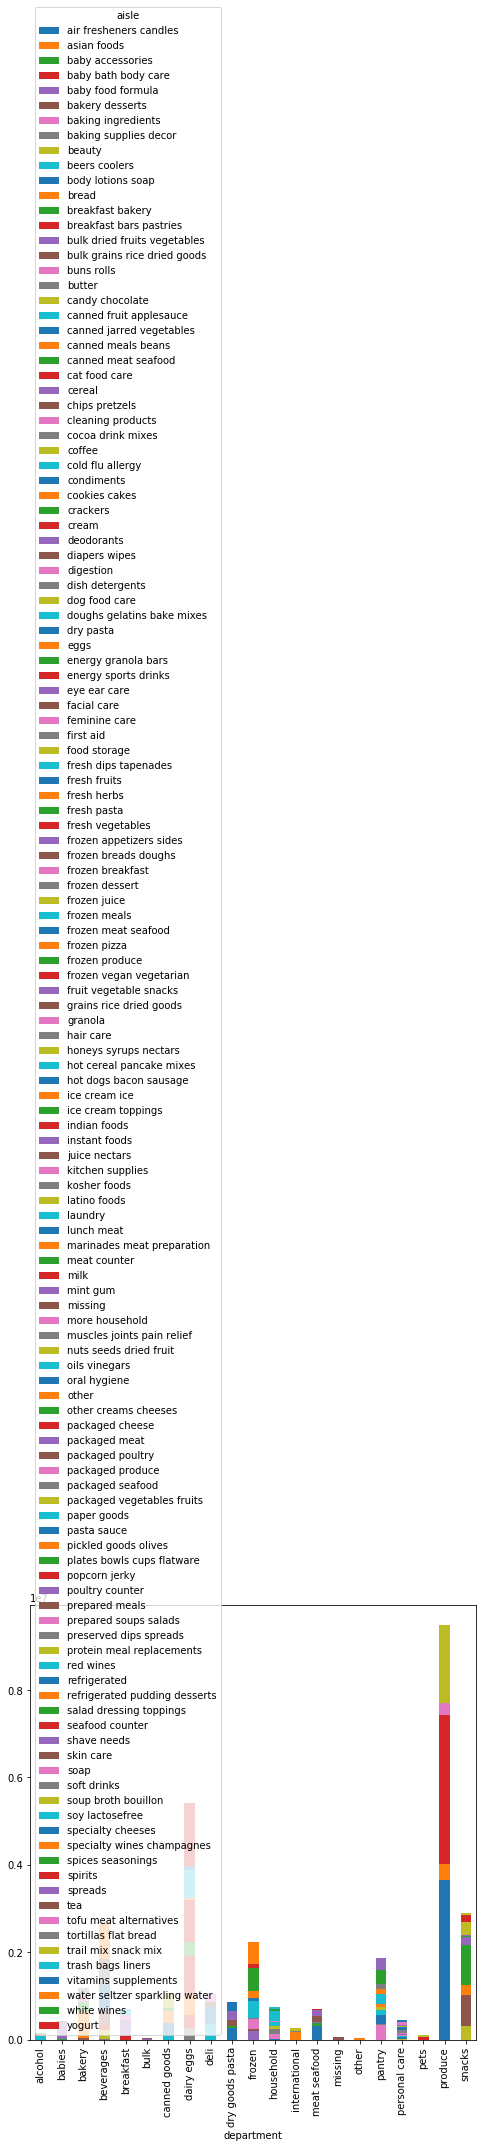

In [56]:
Col1ViseCol2Plot(order_prior,"department","aisle",True)

the most popular departments are produce and dairy eggs and following are the aisles people most frequently go to in Produce- fresh fruits and fresh vegetables. In dairy eggs department, people most frequently go to yogurt, milk and packaged cheese department.
The least popular departments are pets, bulk, missing, other etc which makes sense because
not everyone has pets and bulk purchase is usually not a popular choice among general population. 

In [23]:
#Function to get the n most popular or n least popular products
def TopOrBottomTen(data,Order,n):
    crossed=pd.crosstab(index=data["product_name"],columns="count")
    crossed=crossed.sort_values(['count'],ascending=[Order])
    return crossed.head(n)

In [25]:
TopOrBottomTen(order_prior,False,10)

col_0,count
product_name,
Banana,472565
Bag of Organic Bananas,379450
Organic Strawberries,264683
Organic Baby Spinach,241921
Organic Hass Avocado,213584
Organic Avocado,176815
Large Lemon,152657
Strawberries,142951
Limes,140627


following are the top 10 most popular orders. Almost all the items are fruits, vegetables and milk products and also include organic items which have gained popularity over the time 

In [26]:
TopOrBottomTen(order_prior,True,10)

col_0,count
product_name,
Vitamin D Gummies,1
Orange Recharge,1
"Indoor & Outdoor Allergies, Allergy & Congestion, 24 Hour, Extended Release Tablets",1
Homestlye Cornbread Stuffing,1
Lndbrg White Quinoa 16 Z,1
Organic Finely Shredded Sharp Cheddar Cheese,1
Cinnamon Rice Pudding Snacks,1
Blueberry Blast Fruit and Chia Seed Bar,1
Fig Balsamic Vinegar,1


following are the top 10 least sold items. From the looks of it, these items are not popularly bought and will probably only chosen by a niche sector of customers

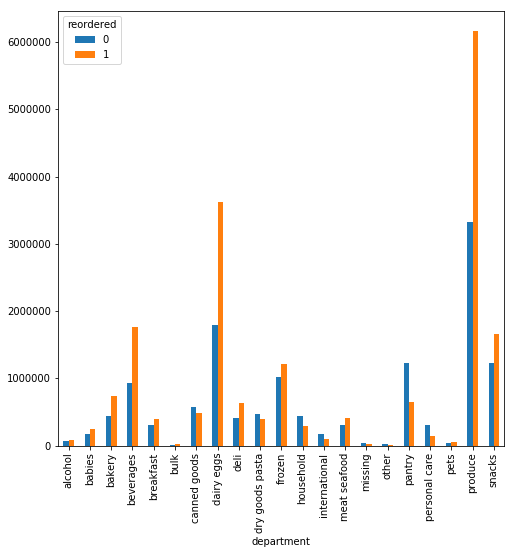

In [57]:
Col1ViseCol2Plot(order_prior,"department","reordered",False)

Following shows the department vise plot of how many times orders were ordered again.

Analysis of first two days of the week which has the highest orders 

In [58]:
order_total=pd.merge(order_prior,orders,on='order_id',how='left')

In [59]:
#order_total=order_total[order_total[order_dow]]
order_total=order_total.loc[order_total['order_dow'].isin(['0','1'])]

In [60]:
TopOrBottomTen(order_total,False,10)

col_0,count
product_name,
Banana,184556
Bag of Organic Bananas,141219
Organic Strawberries,100192
Organic Baby Spinach,97191
Organic Hass Avocado,82506
Organic Avocado,72130
Large Lemon,60445
Limes,53398
Strawberries,52818


following are the top 10 most products in the first 2 days of the week

In [79]:
groupFunc(order_total,'dairy eggs')

,department,aisle,list
index,,,
33,dairy eggs,butter,88158
34,dairy eggs,cream,109915
35,dairy eggs,eggs,169157
36,dairy eggs,milk,319553
37,dairy eggs,other creams cheeses,109271
38,dairy eggs,packaged cheese,364210
39,dairy eggs,refrigerated pudding desserts,12817
40,dairy eggs,soy lactosefree,233748
41,dairy eggs,specialty cheeses,28051


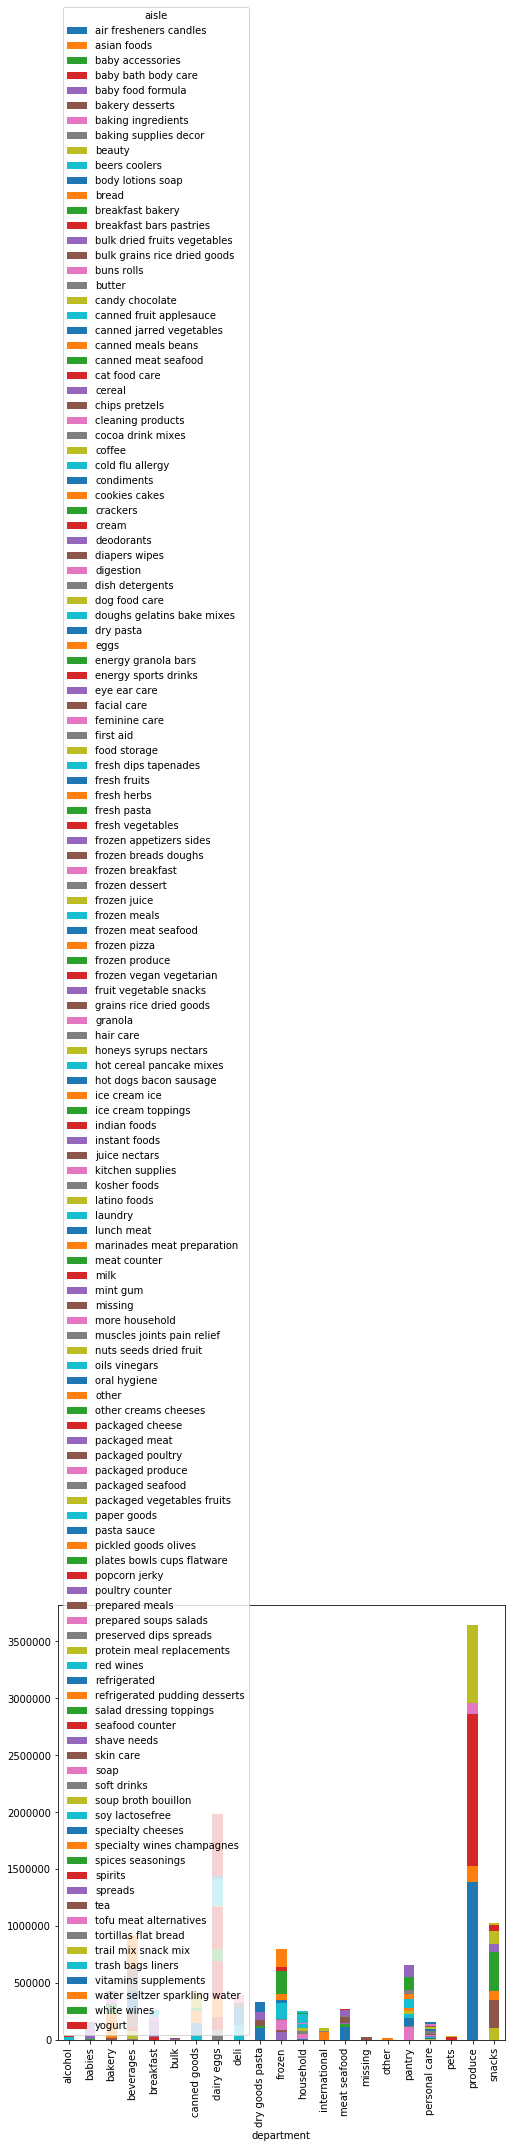

In [61]:
Col1ViseCol2Plot(order_total,"department","aisle",True)

so just like the entire week, the most popular departments in the first two days of the week are 'produce' and 'dairy eggs'. 
The most popular aisles in 'produce' are 'fresh fruits' and 'fresh vegetables' during first two days as well as the entire week. 
for 'dairy eggs', most popular aisles are 'packaged cheese', 'milk' and 'yogurt' in first 2 days,same as it was in the entire week

all in all, the popularity of products, department and aisle in the first two days of the week is same as it is in the entire week. 
Narrowing our analysis would infact give a close prediction for the entire week. That hypothesis will be tested 